# Financial Graveyard: Digging in to Failed Loans
## by Spencer McTavish

## Preliminary Wrangling

Prosper Loans provides a means for individuals to finance personal loans for others throughout the US. They have collected and shared a large dataset of loans for review. The dataset consists of a number of financial indicators and information gathered from those seeking loans for the purposes of assessing those loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Potential Questions
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?

In [2]:
#the csv was 
loans = pd.read_csv('data/prosperLoanData.csv')
loans_def=pd.read_csv('data/prosperLoanData-def.csv')

In [3]:
loans.shape

(113937, 81)

In [4]:
loans_def.shape

(81, 2)

In [5]:
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2727,2BCE3581053180901FE69D7,802127,2013-06-09 09:08:37.160000000,NaN,60,Current,NaN,0.17522,0.1519,0.1419,...,-64.42,0.0,0.00,0.00,0.0,1.0,0,0,0.0,154
7876,DD1B35954581091813246C3,1018442,2013-11-14 17:02:48.873000000,NaN,36,Current,NaN,0.19501,0.1585,0.1485,...,-7.40,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
70167,0814350790094148047AD7A,494154,2011-02-17 05:09:39.827000000,NaN,36,Completed,2013-12-06 00:00:00,0.25424,0.2199,0.2099,...,-126.28,0.0,0.00,0.00,0.0,1.0,0,0,0.0,39
26214,15183365690297581464452,19256,2006-06-12 11:54:21.777000000,HR,36,Defaulted,2007-03-16 00:00:00,0.30614,0.2875,0.2825,...,-1.71,0.0,972.73,972.73,0.0,1.0,0,0,0.0,9
62271,E20635655712394270546F1,684782,2012-12-11 09:00:14.190000000,NaN,60,Completed,2013-12-27 00:00:00,0.34408,0.3165,0.3065,...,-38.32,0.0,0.00,0.00,0.0,1.0,0,0,0.0,55
55446,A76B35418766953856737CD,567777,2012-03-11 20:24:16.913000000,NaN,60,Current,NaN,0.14766,0.1296,0.1196,...,-123.84,0.0,0.00,0.00,0.0,1.0,0,0,0.0,128
2720,0B1F3601718436963EE7CA6,1147309,2014-02-08 08:34:00.410000000,NaN,36,Current,NaN,0.09065,0.0769,0.0669,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,92
58191,54D03551873947474E52806,607018,2012-07-02 21:22:06.337000000,NaN,60,Current,NaN,0.23318,0.2085,0.1985,...,-84.07,0.0,0.00,0.00,0.0,1.0,0,0,0.0,104
55557,965D346568562559168C43B,429320,2009-10-19 09:29:12.577000000,NaN,36,Completed,2012-07-25 00:00:00,0.11848,0.1150,0.1050,...,-230.20,0.0,0.00,0.00,0.0,1.0,0,1,30.0,545
102756,0D5D3553650196124FB14D9,618800,2012-07-31 13:34:05.370000000,NaN,36,Current,NaN,0.23121,0.1939,0.1839,...,-60.74,0.0,0.00,0.00,0.0,1.0,0,0,0.0,106


In [6]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

The dataset is a large .csv consisting of each loan made by Prosper. It consists of a mass of individual data points for each loan. 

There exists a MemberKey column that is a unique identifier for each borrower in the dataset, which can be used for comparison purposes. 

### What is/are the main feature(s) of interest in your dataset?

I'm interested in answering the question: 
> "What factors affect a loan's outcome status?"

This measure is captured under `LoanStatus`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Relevant data should be unique to each loan, and indicative of the type of loan. The definitions in `loans_def` were reviewed to determine areas of possible interest. These were also grouped in to categories, summarized here: 


|Credit History                  |  Loan Info                 | Borrower Info                  |
|--------------------------------|----------------------------|--------------------------------|
|  `CreditGrade`                 |  `Term`                    |  `Occupation`                  |
|  `ProsperRating (Alpha)`       |  `BorrowerAPR`             |  `EmploymentStatus`            |
|  `ProsperScore`                |  `BorrowerRate`            |  `EmploymentStatusDuration`    |
|  `CreditScoreRangeLower`       |  `LenderYield`             |  `IsBorrowerHomeowner`         |
|  `CreditScoreRangeUpper`       |  `EstimatedEffectiveYield` |  `DebtToIncomeRatio`           |
|  `CurrentCreditLines`          |  `EstimatedLoss`           |  `IncomeRange`                 |
|  `ScorexChangeAtTimeOfListing`             |  `EstimatedReturn`         |  `IncomeVerifiable`            |
|  `TotalCreditLinespast7years`  |  `LoanOriginalAmount`      |  `StatedMonthlyIncome`         |
|  `OpenCreditLines`             |  `MonthlyLoanPayment`      |  `MemberKey`                   |
|  `OpenRevolvingAccounts`       |  `ListingCategory`         |  `Recommendations`             |
|  `InquiriesLast6Months`        |          &nbsp;                   |  `InvestmentFromFriendsCount`  |
|  `TotalInquiries`              |    &nbsp;                  |  `InvestmentFromFriendsAmount` |
|  `CurrentDelinquencies`        |      &nbsp;                    |  `Investors`                   |
|  `AmountDelinquent`            |          &nbsp;               |                                |
|  `DelinquenciesLast7Years`     |          &nbsp;             |                                |
|  `PublicRecordsLast10Years`    |            &nbsp;             |                                |
|  `PublicRecordsLast12Months`   |            &nbsp;            |                                |
|  `RevolvingCreditBalance`      |            &nbsp;           |                                |
|  `BankcardUtilization`         |              &nbsp;         |                                |
|  `AvailableBankcardCredit`     |              &nbsp;         |                                |
|  `TotalTrades`                 |               &nbsp;        |                                |
|  `TradesNeverDelinquent`       |               &nbsp;        |                                |
|  `TradesOpenedLast6Months`     |               &nbsp;      |                                |






We're going to limit this exploration to a smaller range of variables for the sake of my own sanity, and based on my current understanding of the workings of a loan. My hypothesis is that these overall concepts will lead to debt failure: 
* Over leveraging. Current debt ratios will affect an individual's ability to pay the loan back. 
* Past failure. Poor credit scores and past failures are a risk factor in a new loan failing. 
* Aggressive loans. High-rate loans are likely to cause difficulties for someone trying to pay them back.
* Social support. A presence of a social network should suggest a healthy financial backing and an ability to pay back the loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Let's look in to our loan statuses to see what we're dealing with. 

In [7]:
loans.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

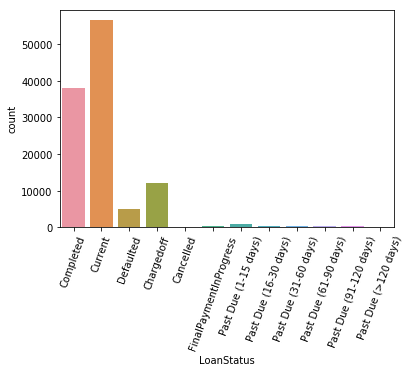

In [8]:
status_order = ['Completed', 'Current','Defaulted','Chargedoff','Cancelled',
         'FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)',
         'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)', 
         'Past Due (>120 days)']
sb.countplot(data=loans,x='LoanStatus',order=status_order)
plt.xticks(rotation=70)

In [9]:
# are Canceleld loans worth keeping around?  
(loans['LoanStatus']=='Cancelled').sum()
#sure

5

The datapoints we'll be using to measure a loan's success are `Completed`, `Defaulted`, `Chargedoff`,`Cancelled`, and `FinalPaymentInProgress`. Including `Current` loans as a success measure could be defended, but when looking at outcomes, I'd prefer to start with concrete outcomes. Let's reduce our dataset to these items for further review. 

In [10]:
#grab completed loans only for review
loans_c = loans[loans['LoanStatus'].isin(['Completed','Defaulted','Chargedoff','Cancelled','FinalPaymentInProgress'])]
loans_c.LoanStatus.unique()

array(['Completed', 'Defaulted', 'Chargedoff', 'Cancelled',
       'FinalPaymentInProgress'], dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

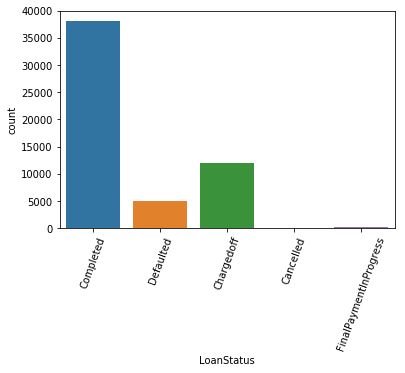

In [11]:
sb.countplot(data=loans_c,x='LoanStatus')
plt.xticks(rotation=70)

In [12]:
#let's look at loan failure and success rates
loan_failure = ['Defaulted','Chargedoff','Cancelled']
loan_success=['Completed','FinalPaymentInProgress']
loans_c['LoanStatus'].isin(loan_failure).sum()/loans_c.shape[0] , loans_c['LoanStatus'].isin(loan_success).sum()/loans_c.shape[0]

(0.307718739827106, 0.6922812601728939)

While most of our loans are successful, there is still a large portion of failed loans in this dataset. 30.8% failure rate seems pretty risky! 

### Credit Grade Inspection
Let's review the variation in credit grades for our Prosper Loans. We'll need to  tidy up this data first - there are two Credit Grade scores, a pre-2009 `CreditGrade` and a post 2009 `ProsperRating (Alpha)`.

In [13]:
#type check
loans_c[['CreditGrade','ProsperRating (Alpha)']].dtypes

CreditGrade              object
ProsperRating (Alpha)    object
dtype: object

In [14]:
#values check Thanks to:https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns 
#np.unique()
loans_c['CreditGrade'].unique()

array(['C', 'HR', nan, 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [15]:
loans_c['ProsperRating (Alpha)'].unique()

array([nan, 'HR', 'D', 'E', 'A', 'AA', 'B', 'C'], dtype=object)

In [16]:
#CreditGrade is easier to write, so we'll maintain the ratings there. Any NA values found there will be filled by
#Prosper Rating values. Assume these are equivalent for now - we can go check this assumption by 

loans_c['CreditGrade'].fillna(loans_c['ProsperRating (Alpha)'],inplace = True)

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
#check any NaN items
loans_c['CreditGrade'].isna().sum()

131

In [18]:
#see what NaN items are - just bad data? Do we have credit data?
loans_c[loans_c['CreditGrade'].isna()][['CreditScoreRangeLower','CreditScoreRangeUpper']].isna().sum()

CreditScoreRangeLower    0
CreditScoreRangeUpper    0
dtype: int64

In [19]:
#we have credit data - it shoudl be possible to go fix this by figuring out what the credit scores are and binning them
#but will leave this as an exercise for later. Let's mark them as none for now and see how big a problem this is
loans_c['CreditGrade'].fillna('none',inplace=True)

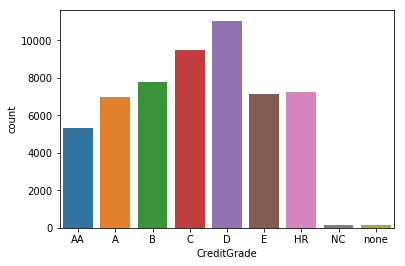

In [20]:
credit_order = ['AA','A','B','C','D','E','HR','NC','none']
sb.countplot(x = loans_c['CreditGrade'],order=credit_order)

It's interesting to see that a D credit grade is the most common value, and that E and HR credit grades are equally represented and with a sharp drop-off after D credit grade. Our population is somewhat skewed as a result. Fortunately, data where we're missing credit grades is fairly low. We'll leave these rows in the dataframe for now in case another variable will expose something interesting. 

### Credit Scores

Given the assumption that past credit predictors are expected to be a good indicator of success, let's see where these values range. 

In [21]:
loans_c['CreditScoreRangeLower'].describe()

count    54703.000000
mean       671.847979
std         81.823962
min          0.000000
25%        640.000000
50%        680.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

In [22]:
loans_c['CreditScoreRangeUpper'].describe()

count    54703.000000
mean       690.847979
std         81.823962
min         19.000000
25%        659.000000
50%        699.000000
75%        739.000000
max        899.000000
Name: CreditScoreRangeUpper, dtype: float64

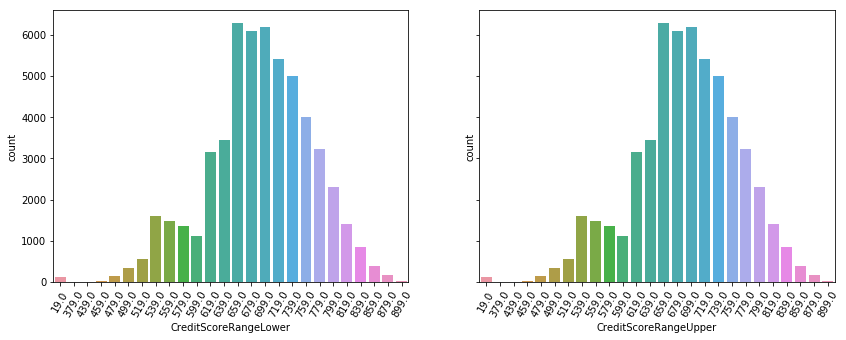

In [23]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(14,5))

sb.countplot(data=loans_c, x = 'CreditScoreRangeLower',ax=ax[0])
sb.countplot(data=loans_c, x = 'CreditScoreRangeUpper',ax=ax[1])
for ax in ax:
    plt.sca(ax)
    plt.xticks(rotation=60)

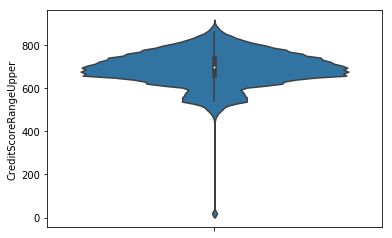

In [24]:
sb.violinplot(data=loans_c,y='CreditScoreRangeUpper')

The credit score ranges suggest the same distribution in `CreditGrade`, with a large number of middle of the road scores followed by a snigificant drop-off afterwards. 

It appears that we have some outlier data as well, with the rows in the 19.0 bin. 


In [25]:
# Let's look at credit score variance to see if there's any meaningful differnces to review
loans_c['CreditScoreVar'] = loans_c['CreditScoreRangeUpper'] - loans_c['CreditScoreRangeLower']
loans_c['CreditScoreVar'].describe()

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    54703.0
mean        19.0
std          0.0
min         19.0
25%         19.0
50%         19.0
75%         19.0
max         19.0
Name: CreditScoreVar, dtype: float64

Well, that doesn't show anything useful. Let's ignore that. We'll just use `CreditScoreRangeUpper` going forward.

In [26]:
loans_c.drop(axis = 'columns', labels = ['CreditScoreVar','CreditScoreRangeLower'],inplace=True)

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Loan Information  

Let's look in to what sort of ranges on loan terms we have. How long do the loans last, how do they vary in amount, monthly payment, and APR?

What kinds of loans are we dealing with?

In [27]:
loans_c['BorrowerAPR'].describe()

count    55269.000000
mean         0.222220
std          0.088163
min          0.006530
25%          0.149740
50%          0.214340
75%          0.295100
max          0.512290
Name: BorrowerAPR, dtype: float64

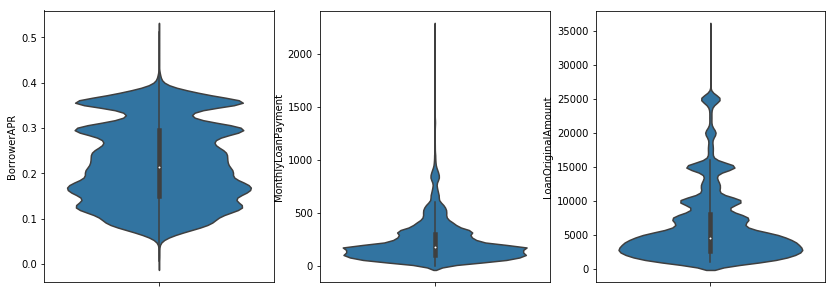

In [28]:
fig,ax = plt.subplots(1,3,figsize=(14,5))

sb.violinplot(data=loans_c, y = 'BorrowerAPR',ax=ax[0])
sb.violinplot(y=loans_c['MonthlyLoanPayment'],ax=ax[1])
sb.violinplot(y=loans_c['LoanOriginalAmount'],ax=ax[2])

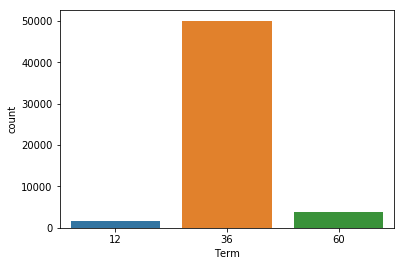

In [29]:
sb.countplot(x=loans_c['Term'])

In [30]:
loans_c['MonthlyLoanPayment'].describe()

count    55294.000000
mean       223.992288
std        186.097437
min          0.000000
25%         98.570000
50%        172.600000
75%        300.785000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

We can see that there's some obvious clustering in terms of `BorrowerAPR`, `MonthlyLoanPayment` and `OriginaLoanAmounts`. It's not clear if there's any obvious relationships to the failure rate of a loan, which we'll have to explore using more variables in our exploration. 

Let's take a peek at listing categories next to see if there seems to be an interesting spread of data there.

In [31]:
#Listing Categorys are currently numeric. Let's make them easier to read and plot

#based on description from Loan Data Definitions, make a replacement dictionary
listing_categories = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 
                      5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure',
                      11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental',
                      16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

loans_c['ListingCategory (numeric)'].replace(listing_categories,inplace=True)
loans_c.rename(columns = {'ListingCategory (numeric)':'ListingCategory'},inplace=True)


C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


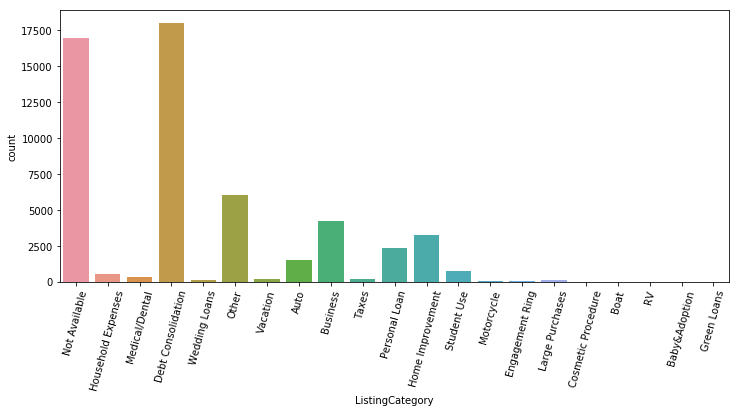

In [32]:
plt.subplots(figsize=(12,5))
sb.countplot(data=loans_c, x = 'ListingCategory');
plt.xticks(rotation=75);

We see some obvious peaks in loan distribution. Most of the loans appear to be Debt Consolidation loans. I'm curious to see if there's going to be a higher failure rate in debt consolidation loans, compared to the other types of loans.

### Borrower Information

I want to assess a few items here to see if there's areas worth further exploration. I'm particularly interested in income and debt ratios to see if there's any interesting variation which would suggest that multivariate analysis is worthwhile in those cases. 

My current hypothesis is that low debt to income ratios, high incomes and verifiable incomes make for less risky loans.

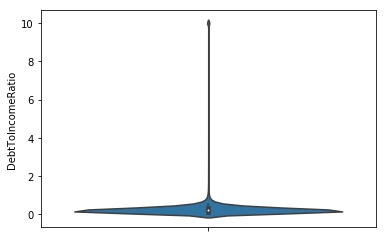

In [33]:
sb.violinplot(data=loans_c, y = 'DebtToIncomeRatio');

In [34]:
loans_c['DebtToIncomeRatio'].describe()

count    51048.000000
mean         0.289622
std          0.735379
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

Well, the violin plot shows very little variation in ratios, beyond some intense outliers. It was noted that the description for this variable includes the caveat: 'This value is capped at 10.01'. Given the small cluster of ratios in that area, it suggests that there's a wide range of high debt to income ratios gathered by that data-point. 

The lack of variation in the ratios on the lower end of the scale are interesting, and suggest that this may be a poor indicator of loan success or failure.

In [35]:
loans_c['IncomeRange'].unique()

array(['$25,000-49,999', 'Not displayed', '$1-24,999', '$50,000-74,999',
       '$75,000-99,999', '$100,000+', 'Not employed', '$0'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

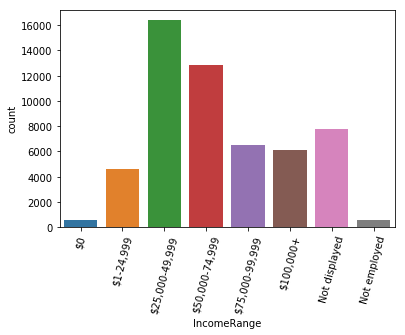

In [36]:
income_order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed']
sb.countplot(data=loans_c, x = 'IncomeRange',order=income_order);
plt.xticks(rotation=75)

There's variation in income_ranges. This relationship is somewhat similar in nature to the Credit Grade ratings we were reviewing earlier. It's not likely that this is a causal relationship, but it's worth reviewing in terms of loan failure rates.

In [37]:
loans_c['IncomeVerifiable'].describe()

count     55294
unique        2
top        True
freq      50977
Name: IncomeVerifiable, dtype: object

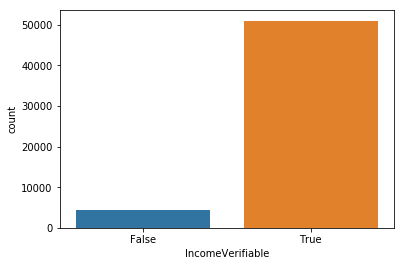

In [38]:
sb.countplot(data=loans_c, x = 'IncomeVerifiable',);


In [39]:
loans_c['StatedMonthlyIncome'].describe()

count     55294.000000
mean       5059.162183
std        5706.202157
min           0.000000
25%        2816.666667
50%        4166.666667
75%        6250.000000
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

In [53]:
loans_c['StatedMonthlyIncome'].isna().sum()

0

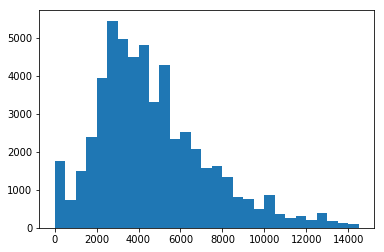

In [63]:
plt.hist(x = loans_c['StatedMonthlyIncome'], bins = range(0,15000,500));

The data shows that most of the loans have verifiable income - which is to be expected. The range of monthly incomes also shows significant skew, but most of our data appears to be in the $4000/mo range. 

While this is an expected result, it suggests that there may be a link between this data and loan outcomes.

The final piece of information I'm going to review is the social aspect of these loans. There are items in the dataset relating to friends investing in a loan. 

I suspect there may be an interesting relationship between friend investment and loan outcome, but I want to see if there's any meaningful variation in that data first.

In [66]:
loans_c['Recommendations'].describe()

count    55294.000000
mean         0.089087
std          0.452971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.000000
Name: Recommendations, dtype: float64

(array([5.1489e+04, 0.0000e+00, 3.1260e+03, 0.0000e+00, 5.1400e+02,
        0.0000e+00, 1.0000e+02, 0.0000e+00, 2.6000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 9 Patch objects>)

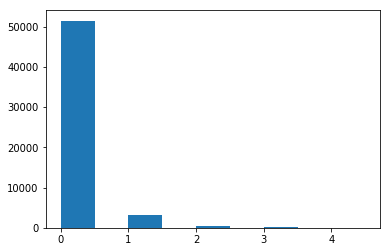

In [71]:
plt.hist(loans_c['Recommendations'],bins=np.arange(0,5,0.5))

(array([5.3278e+04, 0.0000e+00, 1.7300e+03, 0.0000e+00, 2.0700e+02,
        0.0000e+00, 3.9000e+01, 0.0000e+00, 1.5000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 9 Patch objects>)

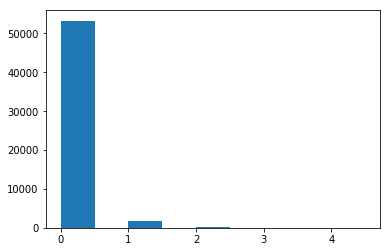

In [75]:
plt.hist(loans_c['InvestmentFromFriendsCount'],bins=np.arange(0,5,0.5))

In [82]:
loans_c['InvestmentFromFriendsAmount'].describe()

count    55294.000000
mean        33.470964
std        421.395202
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      25000.000000
Name: InvestmentFromFriendsAmount, dtype: float64

(0, 2000)

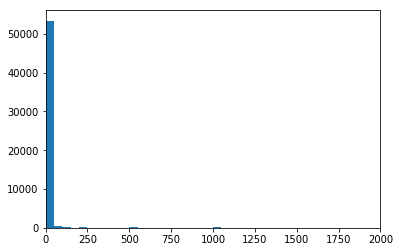

In [92]:
plt.hist(x= loans_c['InvestmentFromFriendsAmount'],bins = range(0,5000,50));
plt.xlim(0,2000)

Unfortunately, there's very little data relating to these familial and fraternal investments. While it's likely that we can draw some sort of link between these investment activities and the success of any given loan. We'll leave these variables out of our analysis.  

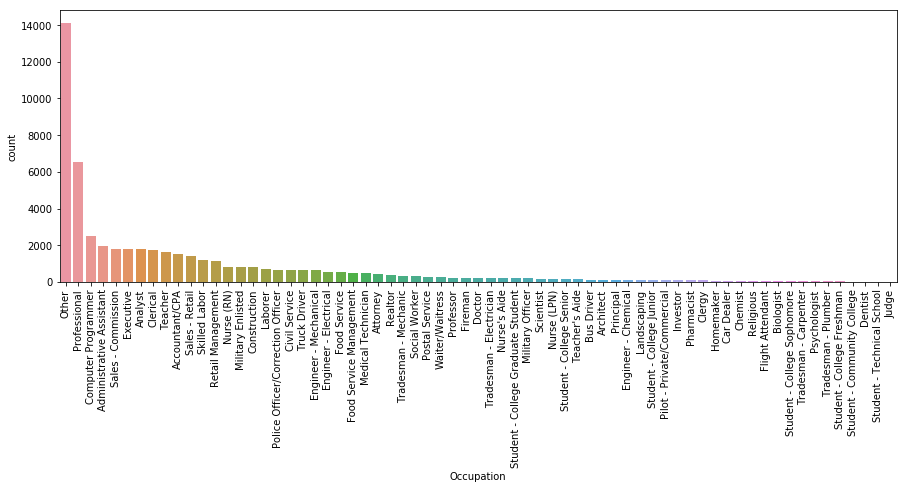

In [101]:
plt.subplots(figsize=(15,5))
sb.countplot(x=loans_c['Occupation'],order=loans_c['Occupation'].value_counts().index);
plt.xticks(rotation=90);

There appears to be a decent spread of values for Occupation, beyond that reported as 'Other'. There may be some interesting relationships that can be drawn here in terms of loan risk, but this will be a low priority item for now.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It appears that there is some significant variation in borrowing terms, credit grades and scores, and in income ranges. All of these suggest that there's some sort of variation in that data, which suggests that it's wortwhile reviewing these items against `LoanStatus` to determine if there are any major 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Items to Check based on Univariate Exploration
* `CreditGrade` vs `LoanStatus` completion and develop a rate for them 
* Look in to how `BorrowerAPR` varies with Term, as well as `MonthlyPayments`

Let's see how our Credit Grade affects our completion status.

In [42]:
#assume LoanStatus in FinalPaymentInProgress is the same as complete, to make our math easier
loans_c['LoanStatus'].replace(to_replace = 'FinalPaymentInProgress', value='Completed',inplace=True)

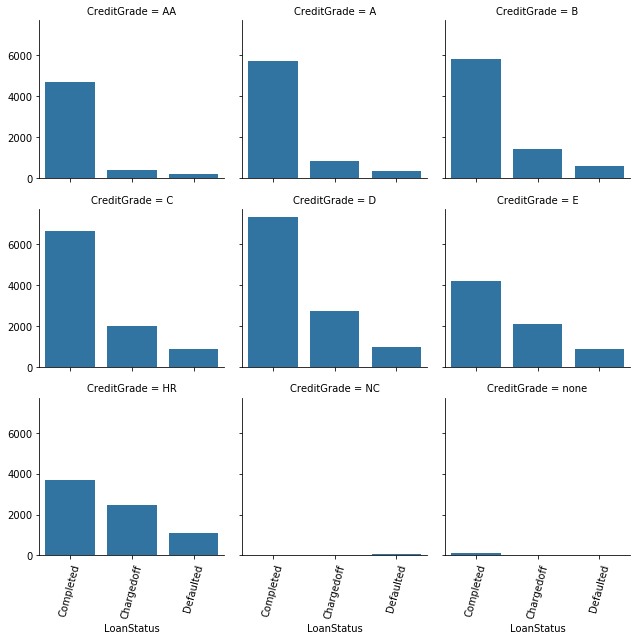

In [43]:
g = sb.FacetGrid(data=loans_c, col = 'CreditGrade',col_wrap=3,col_order=credit_order)
plt.xticks(rotation=75)
g.map(sb.countplot,"LoanStatus",order=['Completed','Chargedoff','Defaulted']);
g.set_xticklabels(rotation=75)

While interesting, and there is obvioulsy a trend to the completion rates between each Credit Grade, it would be better if we can see an actual rate and plot that. We'll review this in the multivariate analysis. 

### Loan Information Relationships

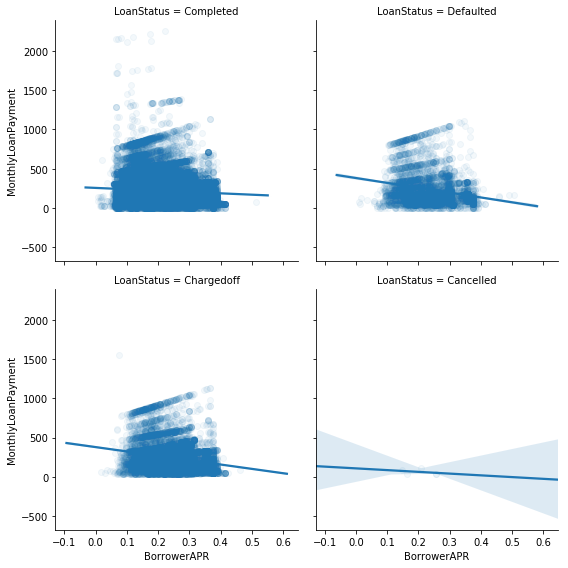

In [44]:
g= sb.FacetGrid(data = loans_c, col = 'LoanStatus',sharex=True,height=4,aspect=1,col_wrap=2)
g.map(sb.regplot,'BorrowerAPR','MonthlyLoanPayment',scatter_kws={'alpha':0.05});

There doesn't appear to be any significant difference in trend between `BorrowerAPR` and `MonthlyLoanPayments`, which is surprising. I would have expected toee some form of difference between the two. There's definitely some overplotting to contend with. 

With the regression line drawn, we can see that there's some difference in the relationship between `BorrowerAPR` and `MonthlyLoanPayments` for each of the `LoanStatus` groups. It appears that a higher APR and lower monthly payments are realated to whether a loan will success or fail.

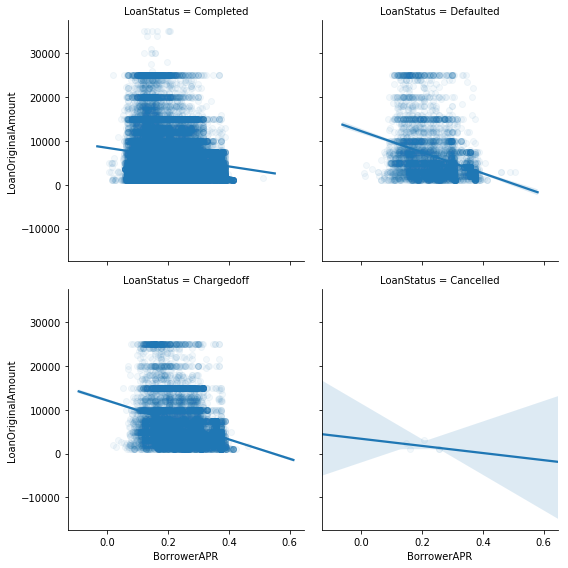

In [45]:
g= sb.FacetGrid(data = loans_c, col = 'LoanStatus',sharex=True,height=4,aspect=1,col_wrap=2)
g.map(sb.regplot,'BorrowerAPR','LoanOriginalAmount',scatter_kws={'alpha':0.05});

A comparison between `LoanOriginalAmount` and `BorrowerAPR` shows a negative relationship - higher Borrower APR's correspond with smaller loan amounts. This may be related to the borrowing power supplied by past credit history, which is worth checking in to further. 

It's interesting to note that there appears to be similar distributions across each of the `LoanStatus` types, with a noticeable negative trend between Completed and Failed loans. This may suggest that higher APR loans are more likely to fail.

In [119]:
loans_c['LoanStatus'] = loans_c['LoanStatus'].astype('category')

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


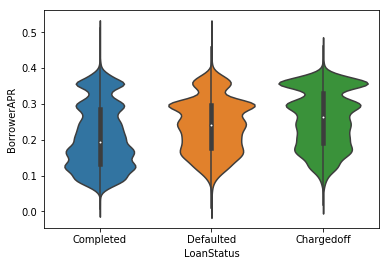

In [121]:
sb.violinplot(data=loans_c, x='LoanStatus' ,y = 'BorrowerAPR', order =['Completed','Defaulted','Chargedoff']);

The violin plots again show that completed loans are more likely to have lower `BorrowerAPR` values. This suggests there's a relationship worth looking in to regarding APR and `CreditGrade` again. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Loan Status and Credit Grades

There was a suggested relationship between `CreditGrade` and `LoanStatus` during our bivariate exploration. However, while we were only using a histogram approach, the relationship on completion rate is not obvious. 

In [46]:
# Group by Credit Grade, calculate a rate, and make a new dataframe called completion_rates
a = loans_c.groupby(['CreditGrade'])
completion_rates = a['LoanStatus'].value_counts() / a['CreditGrade'].count()
completion_rates = completion_rates.reset_index()
completion_rates.rename(columns = {0:'Rate'},inplace=True)

In [47]:
completion_rates.head()

,CreditGrade,LoanStatus,Rate
0,A,Completed,0.825356
1,A,Chargedoff,0.122467
2,A,Defaulted,0.052034
3,A,Cancelled,0.000144
4,AA,Completed,0.882564


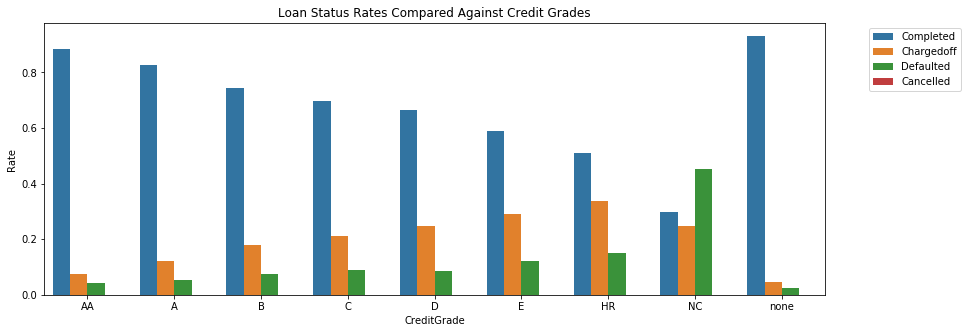

In [48]:
plt.subplots(figsize=(14,5))
sb.barplot(data=completion_rates, x = 'CreditGrade',y='Rate',hue='LoanStatus',order=credit_order)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Loan Status Rates Compared Against Credit Grades');



This shows much better the relationship between Credit Grade and completion rates for any given loan. There's an obvious trend (ignoring the 'none' category, which is where we've gathered anomalous data) between completion rate and Credit Grade. 

Let's take a brief look between rates for a Failure, defined by either a charge-off or a default, and completion. 

In [50]:
#copy existing dataframe
completion_rates_m = completion_rates.copy()
#generate a new dataframe, sort by Loan Status, and group by credit grade. Calculate combined failure rates and append new data
a = completion_rates_m[completion_rates_m['LoanStatus'].isin(['Chargedoff','Defaulted','Cancelled'])].groupby('CreditGrade')
b = a.sum()
b['LoanStatus'] = 'Failed'
b.reset_index(inplace=True)
completion_rates_m = completion_rates_m.append(b,ignore_index=True)

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [51]:
completion_rates_m[completion_rates_m['LoanStatus']=='Failed']

,CreditGrade,LoanStatus,Rate
30,A,Failed,0.174644
31,AA,Failed,0.117436
32,B,Failed,0.255096
33,C,Failed,0.303030
34,D,Failed,0.335204
35,E,Failed,0.410432
36,HR,Failed,0.490764
37,NC,Failed,0.702128
38,none,Failed,0.068702


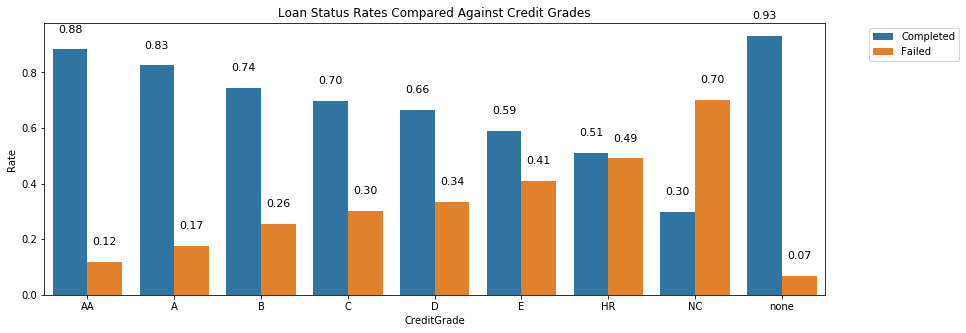

In [52]:
plt.subplots(figsize=(14,5))
g = sb.barplot(data=completion_rates_m, x = 'CreditGrade',y='Rate',hue='LoanStatus',order=credit_order,ci=None,hue_order=['Completed','Failed'])
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Loan Status Rates Compared Against Credit Grades')

#https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart - thanks!
for p in g.patches: 
    g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

ValueError: Could not interpret input 'LoanStatus'

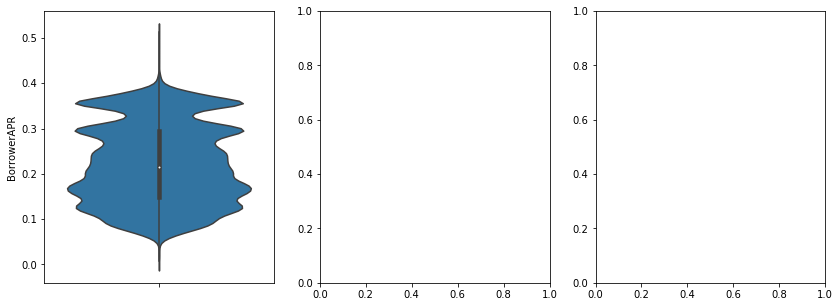

In [103]:
fig,ax = plt.subplots(1,3,figsize=(14,5))

sb.violinplot(data=loans_c, y = 'BorrowerAPR',hue='LoanStatus',ax=ax[0])
sb.violinplot(y=loans_c['MonthlyLoanPayment'],hue='LoanStatus',ax=ax[1])
sb.violinplot(y=loans_c['LoanOriginalAmount'],hue='LoanStatus',ax=ax[2])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!